# Data Dashboard

Dieses Jupyter Notebook beinhaltet Analysen des Datensatzes. Im ersten Abschnitt findest du die Berechnungen einiger Kenngrößen. Im zweiten Abschnitt findest du verschiedene grundlegende Visualisierungen der Daten.<br/>

Die erste Codezelle liest die Daten ein und bereinigt sie. Daher musst du **die erste Codezelle immer ausführen, wenn du
das Notebook neu öffnest**:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import datetime

ratings = pd.read_csv(r'ratings.csv',encoding='latin-1')
movies = pd.read_csv(r'movies.csv',encoding='latin-1')

movies['year'] = movies['title'].str.extract('\(([\d]{4})\)')
movies['title'] = movies['title'].str.replace(r'\([\d]*\)', '').str.strip()
movies['year'] = movies['year'].fillna(0)
movies['year'] = movies['year'].astype('int')

total = pd.merge(movies,ratings,left_on=['movieId'],
              right_on=['movieId'],
              how='inner')

## ----- Datensatz anschauen --------------------------------------------------------------------------------------------
Du kannst dir den Datensatz anschauen, indem du in die folgende Codezelle 'movies', 'ratings' oder 'total' einträgst und die Codezelle ausführst.

In [2]:
total

movieId                            title                        genres  \
0          1  Avatar  (Aufbruch nach Pandora)  Action|Adventure|Sci-Fi|IMAX   
1          1  Avatar  (Aufbruch nach Pandora)  Action|Adventure|Sci-Fi|IMAX   
2          1  Avatar  (Aufbruch nach Pandora)  Action|Adventure|Sci-Fi|IMAX   
3          1  Avatar  (Aufbruch nach Pandora)  Action|Adventure|Sci-Fi|IMAX   
4          1  Avatar  (Aufbruch nach Pandora)  Action|Adventure|Sci-Fi|IMAX   
..       ...                              ...                           ...   
252       29              Wolf of Wall Street            Comedy|Crime|Drama   
253       29              Wolf of Wall Street            Comedy|Crime|Drama   
254       29              Wolf of Wall Street            Comedy|Crime|Drama   
255       29              Wolf of Wall Street            Comedy|Crime|Drama   
256       29              Wolf of Wall Street            Comedy|Crime|Drama   

     year  userId  rating  
0    2009       6     4.0  
1    2009       9     4.0  
2    2009      10     4.0  
3    2009      11     3.0  
4    2009      14     4.0  
..    ...     ...     ...  
252  2013       6     5.0  
253  2013       9     5.0  
254  2013      11     5.0  
255  2013      12     2.0  
256  2013      14     5.0  

[257 rows x 6 columns]

## ----- Datensatz Kennzahlen -------------------------------------------------------------------------------------------
Für einen ersten groben Überblick über die Daten, berechnen wir zunächst ein paar Kennzahlen.<br/>
Mit dem folgenden Code kannst du dir für jede Spalte im Datensatz die konkreten Einträge, sowie die Anzahl an Einträgen ausgeben lassen. Ändere dafür den Namen der Spalte im Code.

In [3]:
print('Einträge im Datensatz:', total['rating'].unique())
print('Anzahl an Einträgen im Datensatz:', len(total['rating'].unique()))

Einträge im Datensatz: [4.  3.  2.  5.  4.5 1.  2.5 3.5]
Anzahl an Einträgen im Datensatz: 8


Wie du vielleicht gemerkt hast, funktioniert der obige Befehl für die einzelnen Genre nicht so gut, da sie in einem einzelnen String in der Spalte angegeben sind. Dafür hilft dir die folgende Codezelle.

In [4]:
print('Verschiedene Genre:', movies['genres'].str.split(pat = '|', expand = False).explode().unique())
print('Anzahl verschiedener Genre:', len(movies['genres'].str.split(pat = '|', expand = False).explode().unique()))

Verschiedene Genre: ['Action' 'Adventure' 'Sci-Fi' 'IMAX' 'Children' 'Comedy' 'Fantasy'
 'Animation' 'Romance' 'Drama' 'War' 'Crime' 'Thriller' 'Musical']
Anzahl verschiedener Genre: 14


Nun wissen wir, wie viele verschiedene Einträge unser Datensatz hat. Daraus ziehen wir eine wichtige Information, die in der folgenden Codezelle berechnet wird: **Welche ist das?**

In [5]:
print(len(total)/(len(total['userId'].unique())*(len(total['movieId'].unique()))))

0.6330049261083743


Über die Ratings wollen wir noch genauere Kennzahlen, wie das minimale (*min*) und maximale Rating (*max*), den <a href="https://de.statista.com/statistik/lexikon/definition/85/median/">Median</a> (*50%*) und den <a href="https://de.statista.com/statistik/lexikon/definition/91/mittelwert_und_arithmetisches_mittel/#:~:text=Der%20Mittelwert%20beschreibt%20den%20statistischen,durch%20die%20Anzahl%20aller%20Werte.">Durchschnitt</a> (*mean*).<br/>
(*Für was könnten die anderen Abkürzungen in der unteren Ausgabe stehen?*)

In [6]:
total['rating'].describe()

count    257.000000
mean       3.708171
std        1.098850
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

## ----- Datensatz Visualisierungen ------------------------------------------------------------------------------------
In diesem Abschnitt des Jupyter Notebooks widmen wir uns der Visualisierung verschiedener Eigenschaften unseres Datensatzes:
<ol>
    <li>Anzahl Filme pro Jahr</li>
    <li>Anzahl Filme pro Genre</li>
    <li>Verteilung der Ratings</li>
    <li>Anzahl Bewertungen pro Film</li>
    <li>Durchschnittliche Bewertung pro Film</li>
    <li>Anzahl Bewertungen pro Nutzer</li>
    <li>Durchschnittliche Bewertung pro Nutzer</li>
    <li>Anzahl Bewertungen pro Genre</li>
    <li>Durchschnittliche Bewertung pro Genre</li>
</ol>

**Bedienungshinweis:** Zu jeder Eigenschaft findest du im folgenden einen eignenen Abschnitt, der immer nach dem gleichen Muster aufgebaut ist. Zu Beginn steht immer eine Codezelle, die die Datenverarbeitung beinhaltet. **In dieser änderst du bitte nichts!** Danach folgen Codezellen mit verschiedenen Visualisierungstypen. Diese kannst du verändern und so deine gewünschte Visualisierung erzeugen. Dazu kannst du **insbesondere die folgenden Stellen ändern:**<br/>
<ul>
    <li>Stellen an denen xxx, 'xxx' oder 'yyy' steht</li>
    <li>das Array farben = [...] (<a href='https://i.stack.imgur.com/lFZum.png'>diese Farben</a> stehen dir zur Auswahl)</li>
</ul>
***Hinweis: Nicht alle Visualisierungstypen, die hier zur Auswahl stehen, sind für die gegebene Eigenschaft sinnvoll!***

## ----- 1 Anzahl Filme pro Jahr -----

In [7]:
count_year_dict = movies['year'].value_counts().sort_index().to_dict()
names = list(count_year_dict.keys())
values = list(count_year_dict.values())

In [8]:
#Variante 1
movies['year'].value_counts().sort_index().rename_axis('xxx').to_frame('xxx')

xxx
xxx      
0       4
1990    1
1994    3
1995    1
1997    1
2002    2
2003    2
2005    1
2007    1
2008    2
2009    2
2011    1
2012    1
2013    3
2014    2
2019    2

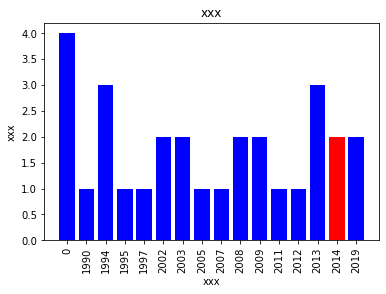

In [9]:
#Variante 2
farben = ['blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','red','blue']
plt.bar(range(len(count_year_dict)), values, color = farben, tick_label=names)
plt.title('xxx')
plt.xlabel('xxx')
plt.ylabel('xxx')
plt.xticks(rotation='vertical')
plt.show()

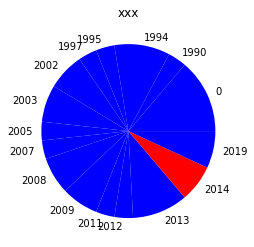

In [10]:
#Variante 3
farben = ['blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','red','blue']
plt.pie(values, labels = names, colors = farben)
plt.title('xxx')
plt.show()

## ----- 2 Filme pro Genre -----

In [11]:
count_genres_dict = {}
for elem in movies['genres'].str.split(pat = '|', expand = False).explode().unique():
    new = {elem:movies[['genres']]['genres'].str.contains(elem).sum()}
    count_genres_dict.update(new)
names = list(count_genres_dict.keys())
values = list(count_genres_dict.values())

In [12]:
#Variante 1
pd.DataFrame({'xxx': names, 'yyy': values}).style.hide_index()

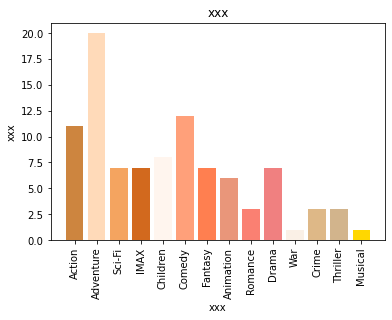

In [13]:
#Variante 2
farben = ['peru', 'peachpuff', 'sandybrown', 'chocolate','seashell', 'lightsalmon', 'coral', 'darksalmon','salmon', 'lightcoral', 'linen', 'burlywood', 'tan', 'gold']
plt.bar(range(len(count_genres_dict)), values, tick_label=names, color=farben)
plt.xticks(rotation='vertical')
plt.title('xxx')
plt.xlabel('xxx')
plt.ylabel('xxx')
plt.show()

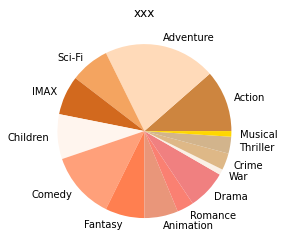

In [14]:
#Variante 3
farben = ['peru', 'peachpuff', 'sandybrown', 'chocolate','seashell', 'lightsalmon', 'coral', 'darksalmon','salmon', 'lightcoral', 'linen', 'burlywood', 'tan', 'gold']
plt.pie(values, labels = names, colors = farben)
plt.title('xxx')
plt.show()

## ----- 3 Verteilung der Ratings -----

In [15]:
count_rating_dict = total['rating'].value_counts().sort_index().to_dict()
names = list(count_rating_dict.keys())
values = list(count_rating_dict.values())

In [16]:
#Variante 1
total['rating'].value_counts().sort_index().rename_axis('xxx').to_frame('xxx')

xxx
xxx     
1.0   11
2.0   25
2.5    2
3.0   55
3.5   11
4.0   78
4.5    7
5.0   68

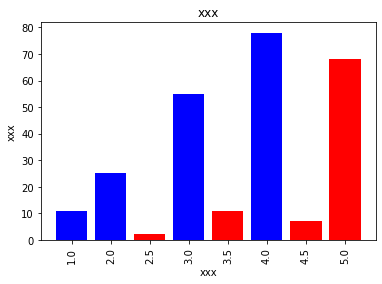

In [17]:
#Variante 2
farben = ['blue','blue','red','blue','red','blue','red','red']
plt.bar(range(len(count_rating_dict)), values, color = farben, tick_label=names)
plt.title('xxx')
plt.xlabel('xxx')
plt.ylabel('xxx')
plt.xticks(rotation='vertical')
plt.show()

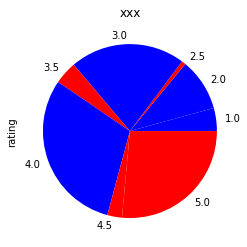

In [18]:
#Variante 3
farben = ['blue','blue','red','blue','red','blue','red','red']
total['rating'].value_counts().sort_index().plot(kind='pie', colors=farben)
plt.title('xxx')
plt.show()

## ----- 4 Anzahl Bewertungen pro Film -----

In [19]:
rating_count = total.groupby(by=['movieId','title']).size().reset_index(name='counts')
rating_count_dict = rating_count[['title','counts']].set_index('title')['counts'].to_dict()
names = list(rating_count_dict.keys())
values = list(rating_count_dict.values())

In [20]:
#Variante 1 (verändere Zahl in head)
xxx = 10
rating_count.sort_values(by = 'counts', ascending=False).head(xxx)

movieId                     title  counts
11       12                    Frozen      14
22       23                 Lion King      14
6         7               Jungle Book      13
17       18                   Ice Age      12
7         8            Fack ju Goethe      11
9        10  Pirates of the Caribbean      11
8         9              Finding Nemo      11
14       15              Harry Potter      11
21       22                Home Alone      11
4         5            Simpsons Movie      10

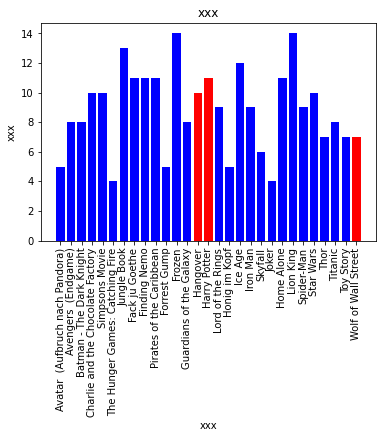

In [21]:
#Variante 2
farben = ['blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','red','red','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','red']
plt.bar(range(len(rating_count_dict)), values, color = farben, tick_label=names)
plt.title('xxx')
plt.xlabel('xxx')
plt.ylabel('xxx')
plt.xticks(rotation='vertical')
plt.show()

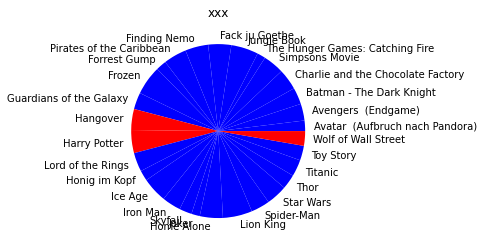

In [22]:
#Variante 3
farben = ['blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','red','red','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','red']
plt.pie(values, labels = names, colors = farben)
plt.title('xxx')
plt.show()

## ----- 5 Durchschnittliche Bewertung pro Film -----

In [23]:
rating_mean = total.groupby(by=['movieId','title']).agg({'rating': 'mean'})
rating_mean_dict = rating_mean['rating'].to_dict()
names = list(rating_mean_dict.keys())
values = list(rating_mean_dict.values())

In [24]:
#Variante 1 (verändere Zahl in head)
xxx = 10
rating_mean.sort_values(by = 'rating', ascending=False).head(xxx)

rating
movieId title                             
21      Joker                     5.000000
16      Lord of the Rings         4.277778
15      Harry Potter              4.272727
27      Titanic                   4.250000
3       Batman - The Dark Knight  4.187500
20      Skyfall                   4.166667
29      Wolf of Wall Street       4.000000
25      Star Wars                 3.950000
19      Iron Man                  3.944444
10      Pirates of the Caribbean  3.909091

## ----- 6 Anzahl Bewertungen pro Nutzer -----

In [26]:
rating_count_user = total.groupby(by=['userId']).size().reset_index(name='counts')
rating_count_user_dict = rating_count_user[['userId','counts']].set_index('userId')['counts'].to_dict()
names = list(rating_count_user_dict.keys())
values = list(rating_count_user_dict.values())

In [27]:
#Variante 1 
xxx = 10
rating_count_user.sort_values(by = 'counts', ascending=False).head(xxx)

userId  counts
10      11      29
5        6      28
8        9      25
9       10      24
3        4      21
1        2      20
4        5      19
12      13      17
13      14      15
7        8      14

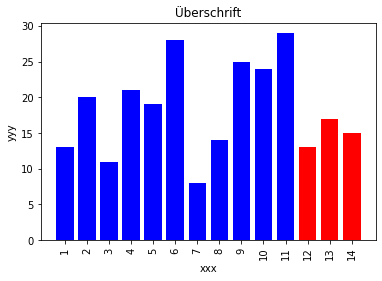

In [28]:
#Variante 2
farben = ['blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','red','red','red']
plt.bar(range(len(rating_count_user_dict)), values, color = farben, tick_label=names)
plt.title('Überschrift')
plt.xlabel('xxx')
plt.ylabel('yyy')
plt.xticks(rotation='vertical')
plt.show()

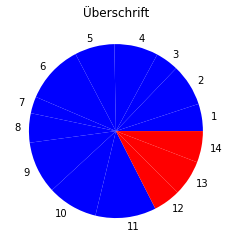

In [29]:
#Variante 3
farben = ['blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','red','red','red']
plt.pie(values, labels = names, colors = farben)
plt.title('Überschrift')
plt.show()

## ----- 7 Durchschnittliche Bewertung pro Nutzer -----

In [30]:
rating_mean_user = total.groupby(by=['userId']).agg({'rating': 'mean'})
rating_mean_user_dict = rating_mean_user['rating'].to_dict()
names = list(rating_count_user_dict.keys())
values = list(rating_count_user_dict.values())

In [31]:
#Variante 1
xxx = 10
rating_mean_user.sort_values(by = 'rating', ascending=False).head(xxx)

rating
userId          
1       4.461538
9       4.280000
3       4.272727
13      4.117647
14      4.000000
10      3.791667
12      3.769231
6       3.678571
8       3.642857
2       3.500000

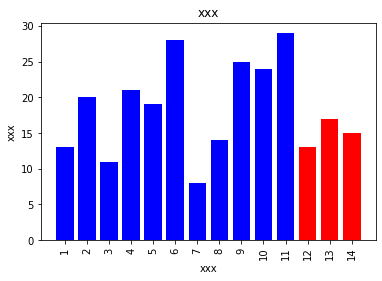

In [32]:
#Variante 2
farben = ['blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','red','red','red']
plt.bar(range(len(rating_mean_user_dict)), values, color = farben, tick_label=names)
plt.title('xxx')
plt.xlabel('xxx')
plt.ylabel('xxx')
plt.xticks(rotation='vertical')
plt.show()

## ----- 8 Anzahl Bewertungen pro Genre -----

In [33]:
count_genresrating_dict = {}
for elem in movies['genres'].str.split(pat = '|', expand = False).explode().unique():
    new = {elem:total[['genres']]['genres'].str.contains(elem).sum()}
    count_genresrating_dict.update(new)
names = list(count_genresrating_dict.keys())
values = list(count_genresrating_dict.values())

In [34]:
#Variante 1
pd.DataFrame({'xxx': names, 'yyy': values}).style.hide_index()

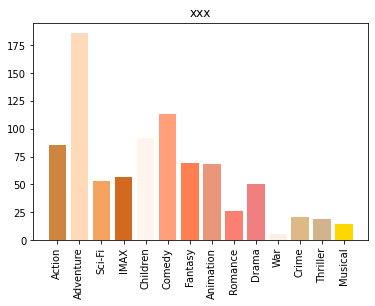

In [35]:
#Variante 2
farben = ['peru', 'peachpuff', 'sandybrown', 'chocolate','seashell', 'lightsalmon', 'coral', 'darksalmon','salmon', 'lightcoral', 'linen', 'burlywood', 'tan', 'gold']
plt.bar(range(len(count_genresrating_dict)), values, tick_label=names, color=farben)
plt.xticks(rotation='vertical')
plt.title('xxx')
plt.show()

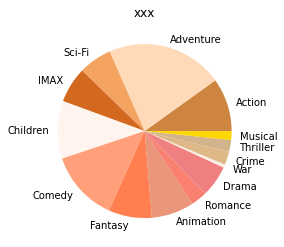

In [36]:
#Variante 3
farben = ['peru', 'peachpuff', 'sandybrown', 'chocolate','seashell', 'lightsalmon', 'coral', 'darksalmon','salmon', 'lightcoral', 'linen', 'burlywood', 'tan', 'gold']
plt.pie(values, labels = names, colors = farben)
plt.title('xxx')
plt.show()

## ----- 9 Durchschnittliche Bewertung pro Genre -----

In [37]:
mean_genres_dict = {}
for elem in movies['genres'].str.split(pat = '|', expand = False).explode().unique():
    new = {elem:total.groupby(total[['genres']]['genres'].str.contains(elem)).agg({'rating':'mean'}).loc[True]['rating']}
    mean_genres_dict.update(new)
names = list(mean_genres_dict.keys())
values = list(mean_genres_dict.values())

In [38]:
#Variante 1
pd.DataFrame({'xxx': names, 'yyy': values}).style.hide_index()

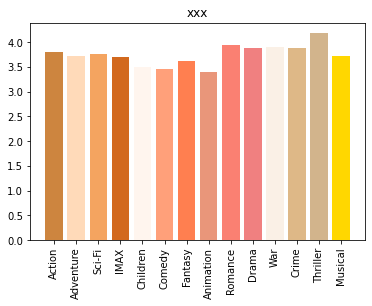

In [39]:
#Variante 2
farben = ['peru', 'peachpuff', 'sandybrown', 'chocolate','seashell', 'lightsalmon', 'coral', 'darksalmon','salmon', 'lightcoral', 'linen', 'burlywood', 'tan', 'gold']
plt.bar(range(len(mean_genres_dict)), values, tick_label=names, color=farben)
plt.xticks(rotation='vertical')
plt.title('xxx')
plt.show()